In [28]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot 
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2

#### 1. –í —Ñ–∞–π–ª–µ lifeline.xls —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è 50 –ø–∞—Ä –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –∏–∑ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –¥–æ–∫—Ç–æ—Ä–æ–≤ –õ. –ú–∞—Ç–µ—Ä–∞ –∏ –ú. –£–∏–ª—Å–æ–Ω–∞. –í –Ω–µ–º —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–ª–∏—Å—å —Å–ª–µ–¥—É—é—â–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ: X ‚Äî –¥–ª–∏–Ω–∞ ¬´–ª–∏–Ω–∏–∏ –∂–∏–∑–Ω–∏¬ª –Ω–∞ –ª–µ–≤–æ–π —Ä—É–∫–µ –≤ —Å–∞–Ω—Ç–∏–º–µ—Ç—Ä–∞—Ö (—Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ 0.15 —Å–º) –∏ Y ‚Äî –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∂–∏–∑–Ω–∏ —á–µ–ª–æ–≤–µ–∫–∞ (–æ–∫—Ä—É–≥–ª–µ–Ω–Ω–∞—è –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ —Ü–µ–ª–æ–≥–æ –≥–æ–¥–∞). –ò–∑—É—á–∏—Ç–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é X –∏ Y . –í–µ—Ä–Ω–æ –ª–∏, —á—Ç–æ X –∏ Y —Å–≤—è–∑–∞–Ω—ã –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å—é?

In [98]:
np.random.seed(21)

In [99]:
data = pd.read_excel('../HW5_Data/lifeline.xls')

In [100]:
data.head()

X   Y
0   9.75  19
1   9.00  40
2   9.60  42
3   9.75  42
4  11.25  47

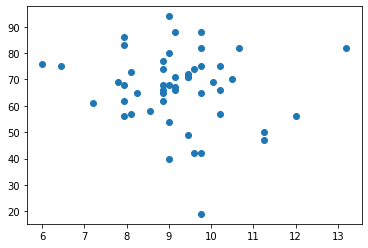

In [101]:
line = data['X']
life = data['Y']
plt.scatter(line, life)
plt.show()

In [102]:
# –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞

stats.pearsonr(line, life)

(-0.122553650859522, 0.3965106928959566)

In [103]:
# –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –°–ø–∏—Ä–º–µ–Ω–∞

stats.spearmanr(line, life)

SpearmanrResult(correlation=-0.08601349137019551, pvalue=0.5525613938198386)

In [104]:
# –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ö–µ–Ω–¥–∞–ª–ª–∞

stats.kendalltau(line, life)

KendalltauResult(correlation=-0.044979908444122044, pvalue=0.6559222232961208)

–í—ã–≤–æ–¥: "–ª–∏–Ω–∏—è –∂–∏–∑–Ω–∏" –∏ –∂–∏–∑–Ω—å –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω—ã.

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


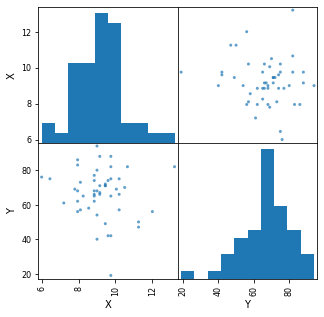

In [105]:
pd.plotting.scatter_matrix(data[['X', 'Y']], figsize=(5, 5), alpha=0.7)
plt.show()

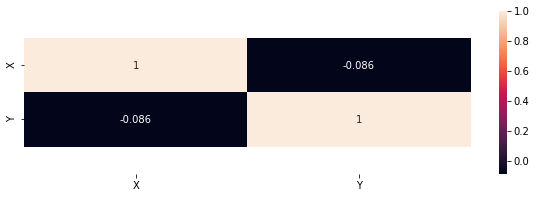

In [106]:
plt.figure(figsize = (10,3))
ax = sns.heatmap(data[['X', 'Y']].corr(method = 'spearman'), annot = True)

# –ø–æ–¥–ø—Ä–∞–≤–∏–º –≤—ã–≤–æ–¥
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#####

plt.show()

–û–±—Ä–∞–±–æ—Ç–∞–µ–º –¥–∞–Ω–Ω—ã–µ

In [107]:
data = data[data['Y'] > 30]

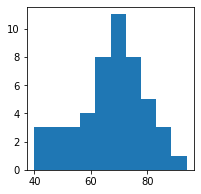

In [108]:
data['Y'].hist(figsize=(3,3), grid=False)
plt.show()

In [109]:
stats.pearsonr(data['X'], data['Y'])

(-0.10541261807860831, 0.471000817300877)

In [110]:
m1 = smf.ols('X ~ Y', data=data)
m1fitted = m1.fit()

print(m1fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5281
Date:                Wed, 05 May 2021   Prob (F-statistic):              0.471
Time:                        19:05:21   Log-Likelihood:                -80.675
No. Observations:                  49   AIC:                             165.4
Df Residuals:                      47   BIC:                             169.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9173      1.022      9.705      0.0

X –∏ Y –Ω–µ —Å–≤—è–∑–∞–Ω—ã –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å—é. –í–∏–¥–∏–º –ø–æ –º–∞–ª–µ–Ω—å–∫–æ–º—É –∑–Ω–∞—á–µ–Ω–∏–± R^2 –∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã–º –∫—Ä–∏—Ç–µ—Ä–∏—è–º: –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–º—É –ª–æ–≥–∞—Ä–∏—Ñ–º—É –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


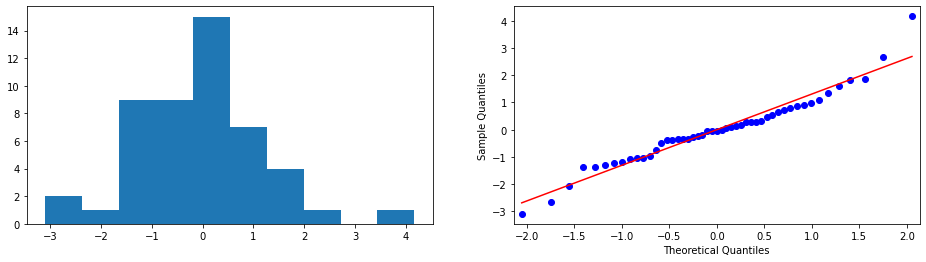

In [111]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

m1fitted.resid.hist(ax=ax1, grid=False)
qqplot(m1fitted.resid, line='r',ax=ax2)

plt.show()

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


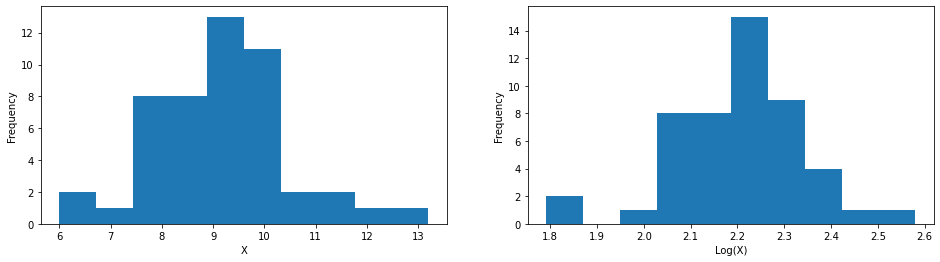

In [112]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

data['X'].plot.hist(ax=ax1, grid=False)
ax1.set_xlabel("X")

np.log(data['X']).plot.hist(ax=ax2, grid=False)
ax2.set_xlabel("Log(X)")

plt.show()

In [113]:
m2 = smf.ols('np.log(X) ~ Y', data=data)
m2fitted = m2.fit()

print(m2fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              np.log(X)   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.6381
Date:                Wed, 05 May 2021   Prob (F-statistic):              0.428
Time:                        19:05:26   Log-Likelihood:                 27.615
No. Observations:                  49   AIC:                            -51.23
Df Residuals:                      47   BIC:                            -47.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2964      0.112     20.486      0.0

–ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —É–ª—É—á—à–∏–ª–∏—Å—å

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


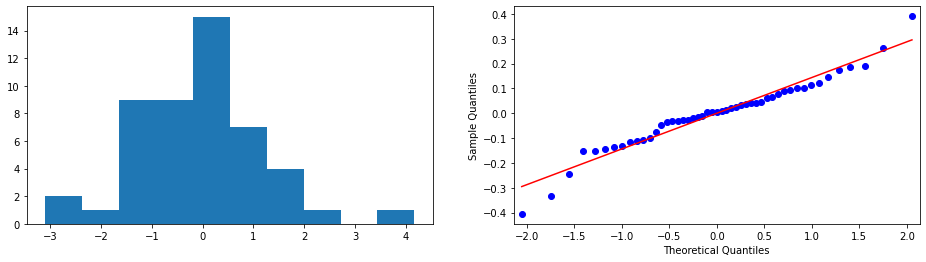

In [114]:


fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

m1fitted.resid.hist(ax=ax1, grid=False)
qqplot(m2fitted.resid, line='r',ax=ax2)

plt.show()

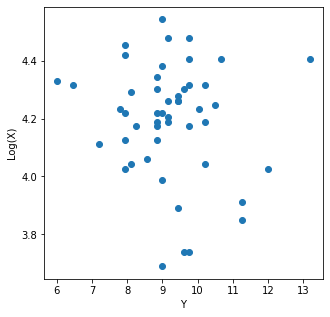

In [115]:
plt.figure(figsize=(5,5))

plt.scatter(data['X'],np.log(data['Y']))
plt.xlabel('Y')
plt.ylabel('Log(X)')

plt.show()

–í–∏–¥–∏–º, —á—Ç–æ "–ª–∏–Ω–∏—è –∂–∏–∑–Ω–∏" –∏ –∂–∏–∑–Ω—å –Ω–µ —Å–≤—è–∑–∞–Ω—ã –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å—é.

#### 2. –í —Ñ–∞–π–ª–µ homes.csv —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è –¥–∞–Ω–Ω—ã–µ –æ —Ü–µ–Ω–µ –ø—Ä–æ–¥–∞–∂–∏ 50 –¥–æ–º–æ–≤. –ß—Ç–æ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å –æ —Å–≤—è–∑–∏ –ø–µ—Ä–≤—ã—Ö –¥–≤—É—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤? –ü–æ—Å—Ç—Ä–æ–π—Ç–µ (—Ö–æ—Ä–æ—à—É—é) –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–∞ Sell —Å –∏ –±–µ–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ List. –ù–µ –∑–∞–±—É–¥—å—Ç–µ –æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –µ—Å–ª–∏ –æ–Ω–∏ –±—É–¥—É—Ç –Ω—É–∂–Ω—ã.

In [142]:
data = pd.read_csv('../HW5_Data/homes.csv')
data.head()

Sell   "List"   "Living"   "Rooms"   "Beds"   "Baths"   "Age"   "Acres"  \
0   142      160         28        10        5         3      60      0.28   
1   175      180         18         8        4         1      12      0.43   
2   129      132         13         6        3         1      41      0.33   
3   138      140         17         7        3         1      22      0.46   
4   232      240         25         8        4         3       5      2.05   

    "Taxes"  
0      3167  
1      4033  
2      1471  
3      3204  
4      3613

1) Sell ‚Äî —Ü–µ–Ω–∞ –ø—Ä–æ–¥–∞–∂–∏;
2) List ‚Äî –∑–∞–ø—Ä–∞—à–∏–≤–∞–µ–º–∞—è —Ü–µ–Ω–∞;
3) Living ‚Äî –∂–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å;
4) Rooms ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç;
5) Beds ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ø–∞–ª–µ–Ω;
6) Baths ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–∞–Ω–Ω—ã—Ö –∫–æ–º–Ω–∞—Ç;
7) Age ‚Äî –≤–æ–∑—Ä–∞—Å—Ç –∂–∏–ª–æ–≥–æ –ø–æ–º–µ—â–µ–Ω–∏—è;
8) Acres ‚Äî –ø–ª–æ—â–∞–¥—å –∂–∏–ª–æ–≥–æ –ø–æ–º–µ—â–µ–Ω–∏—è;
9) Taxes ‚Äî –Ω–∞–ª–æ–≥–∏, –∫–æ—Ç–æ—Ä—ã–µ –¥–æ–ª–∂–µ–Ω –ø–ª–∞—Ç–∏—Ç—å –≤–ª–∞–¥–µ–ª–µ—Ü –∂–∏–ª–æ–≥–æ –ø–æ–º–µ—â–µ–Ω–∏—è.

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


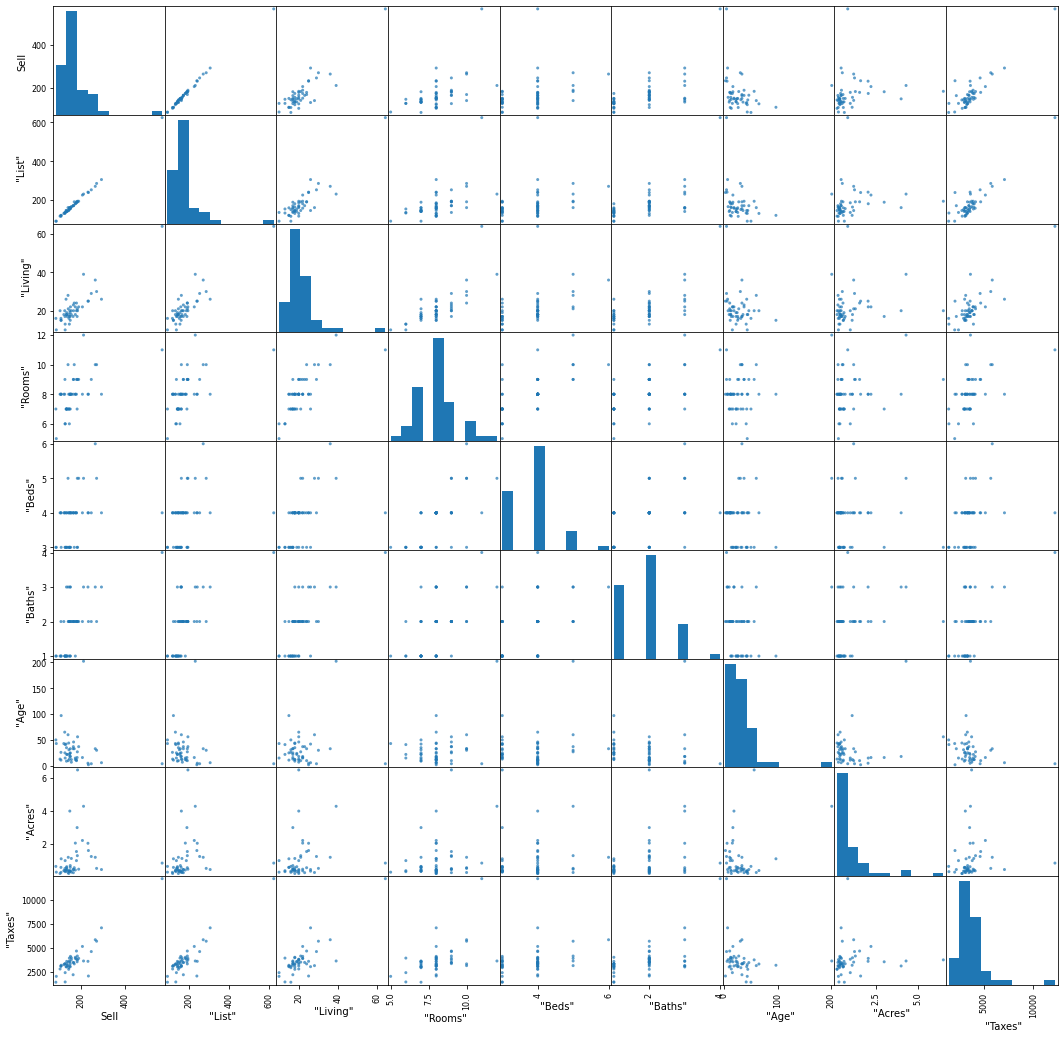

In [143]:
pd.plotting.scatter_matrix(data[list(data.columns)], figsize=(18, 18), alpha=0.7)
plt.show()

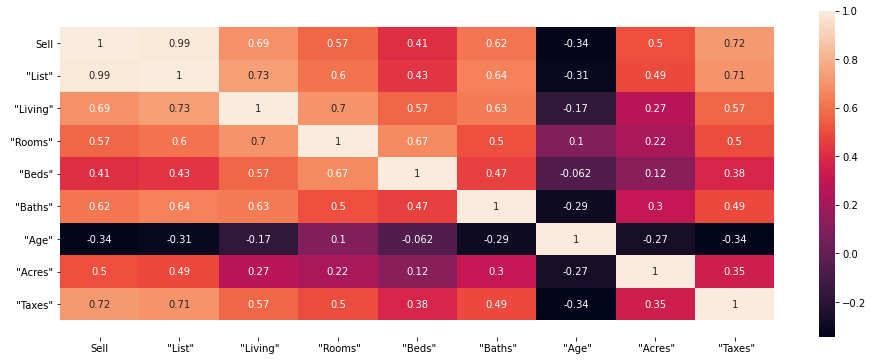

In [144]:
plt.figure(figsize = (16,6))
ax = sns.heatmap(data[list(data.columns)].corr(method = 'spearman'), annot = True)

# –ø–æ–¥–ø—Ä–∞–≤–∏–º –≤—ã–≤–æ–¥
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#####

plt.show()

–ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö:

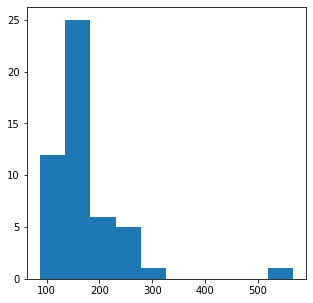

In [145]:
data['Sell'].hist(figsize=(5,5), grid=False)
plt.show()

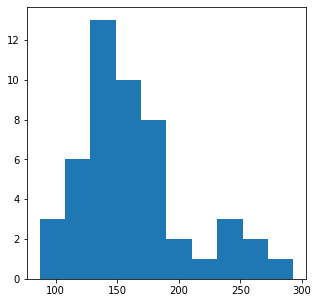

In [146]:
# —É–¥–∞–ª–∏–º –≤—ã–±—Ä–æ—Å
data = data[data['Sell'] < 350]
data['Sell'].hist(figsize=(5,5), grid=False)
plt.show()

In [147]:
data.rename(columns = {' "List"':'List',	' "Living"':'Living',
                     ' "Rooms"':"Rooms",' "Beds"':	"Beds",' "Baths"':	"Baths",
                     ' "Age"':"Age", ' "Acres"':	"Acres", ' "Taxes"':	"Taxes"},
            inplace=True
           )
data.head()

Sell  List  Living  Rooms  Beds  Baths  Age  Acres  Taxes
0   142   160      28     10     5      3   60   0.28   3167
1   175   180      18      8     4      1   12   0.43   4033
2   129   132      13      6     3      1   41   0.33   1471
3   138   140      17      7     3      1   22   0.46   3204
4   232   240      25      8     4      3    5   2.05   3613

–ü–æ—Å–æ–º—Ç—Ä–∏–º –Ω–∞ –∫–æ–∂—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–µ–∂–¥—É Sell –∏ List

In [148]:
sell = data['Sell']
list_ = data['List']
# –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞

stats.pearsonr(sell,list_)

(0.995328161479454, 2.232709536989096e-49)

In [149]:
# –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –°–ø–∏—Ä–º–µ–Ω–∞

stats.spearmanr(sell,list_)

SpearmanrResult(correlation=0.9868486906033123, pvalue=7.442814910794543e-39)

In [150]:
# –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ö–µ–Ω–¥–∞–ª–ª–∞

stats.kendalltau(sell,list_)

KendalltauResult(correlation=0.9349108479221306, pvalue=8.18949461882585e-21)

–ó–Ω–∞—á–µ–Ω–∏—è —Ü–µ–Ω—ã –ø—Ä–æ–¥–∞–∂–∏ –∏ –∑–∞–ø—Ä–∞—à–∏–≤–∞–µ–º–æ–π —Ü–µ–Ω—ã –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç. –ò —ç—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –∑–Ω–∞—á–∏–º–∞.

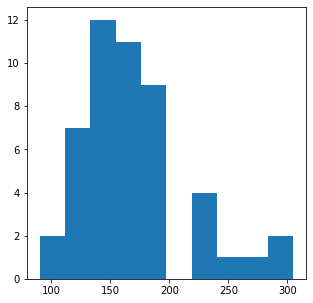

In [151]:
data['List'].hist(figsize=(5,5), grid=False)
plt.show()

In [152]:
data['List'].value_counts()[:5]

145    4
160    3
140    3
170    3
190    3
Name: List, dtype: int64

In [153]:
# —Ä–∞–∑–¥–µ–ª–∏–º –∑–∞–ø—Ä–∞—à–∏–≤–∞–µ–º—É—é —Ü–µ–Ω—É –Ω–∞ –≤—ã—à–µ —Å—Ä–µ–¥–Ω—é—é –∏ –Ω–∏–∂–µ —Å—Ä–µ–¥–Ω–µ–µ
data['belowavg'] = data['List'].apply(lambda x: 1 if x < 150 else 0)
data['aboveavg'] = data['List'].apply(lambda x: 1 if x > 150 else 0)
# data.drop('List', axis=1, inplace=True)

In [154]:
data.head()

Sell  List  Living  Rooms  Beds  Baths  Age  Acres  Taxes  belowavg  \
0   142   160      28     10     5      3   60   0.28   3167         0   
1   175   180      18      8     4      1   12   0.43   4033         0   
2   129   132      13      6     3      1   41   0.33   1471         1   
3   138   140      17      7     3      1   22   0.46   3204         1   
4   232   240      25      8     4      3    5   2.05   3613         0   

   aboveavg  
0         1  
1         1  
2         0  
3         0  
4         1

In [155]:
m1 = smf.ols('Sell ~ Living + Rooms + Beds + Baths + Age + Acres + Taxes + belowavg + aboveavg', data=data)
m1fitted = m1.fit()

print(m1fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     17.62
Date:                Wed, 05 May 2021   Prob (F-statistic):           3.61e-11
Time:                        19:39:35   Log-Likelihood:                -216.21
No. Observations:                  49   AIC:                             452.4
Df Residuals:                      39   BIC:                             471.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.2218     33.890      2.485      0.0

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


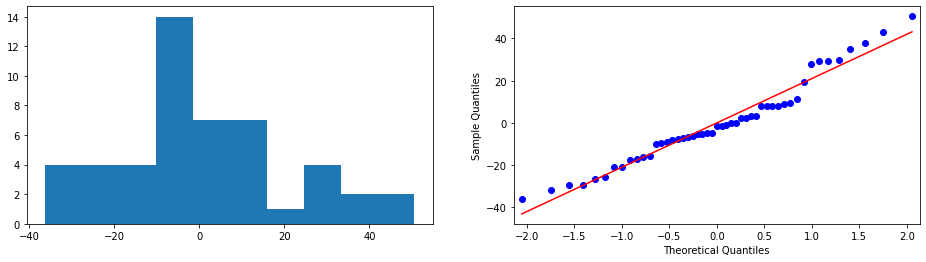

In [156]:
# —Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ—Å—Ç–∞—Ç–∫–∏
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

m2fitted.resid.hist(ax=ax1, grid=False)
qqplot(m2fitted.resid, line='r',ax=ax2)

plt.show()

–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


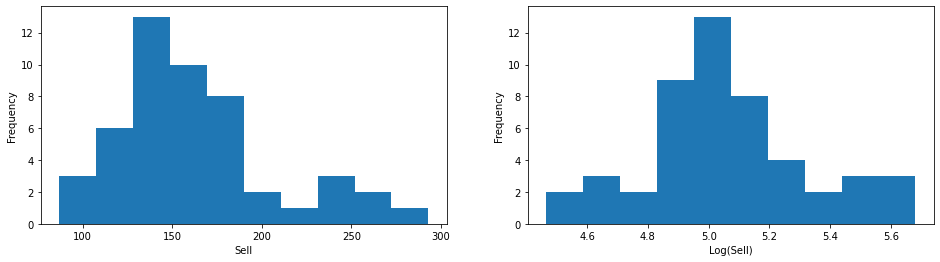

In [157]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

data['Sell'].plot.hist(ax=ax1, grid=False)
ax1.set_xlabel("Sell")

np.log(data['Sell']).plot.hist(ax=ax2, grid=False)
ax2.set_xlabel("Log(Sell)")

plt.show()

In [168]:
m2 = smf.ols('np.log(Sell) ~ Living + Rooms + Beds + Baths + Age + Acres + Taxes + belowavg + aboveavg', data=data)
m2fitted = m2.fit()

print(m2fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Sell)   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     19.73
Date:                Wed, 05 May 2021   Prob (F-statistic):           6.44e-12
Time:                        19:45:36   Log-Likelihood:                 37.778
No. Observations:                  49   AIC:                            -55.56
Df Residuals:                      39   BIC:                            -36.64
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6233      0.190     24.323      0.0

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


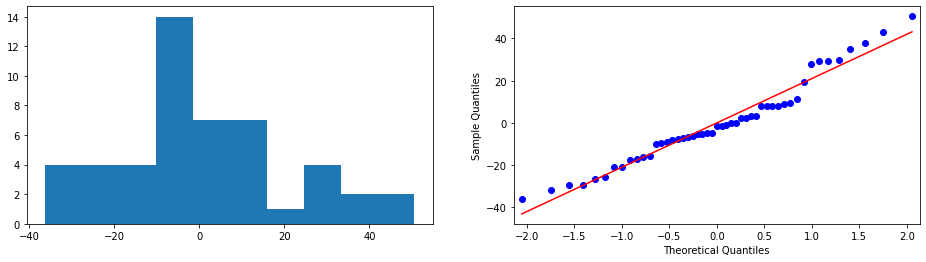

In [159]:
# —Å–º–æ—Ç—Ä–∏–º –æ—Å—Ç–∞—Ç–∫–∏
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

m2fitted.resid.hist(ax=ax1, grid=False)
qqplot(m2fitted.resid, line='r',ax=ax2)

plt.show()

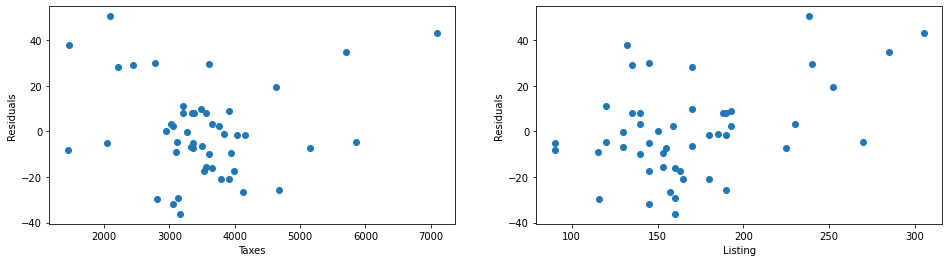

In [161]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4)) 

ax1.scatter(data['Taxes'],m2fitted.resid)
ax1.set_xlabel('Taxes')
ax1.set_ylabel('Residuals')

ax2.scatter(data['List'],m2fitted.resid)
ax2.set_xlabel('Listing')
ax2.set_ylabel('Residuals')

plt.show()

–ü–æ –≤—Ç–æ—Ä–æ–º—É –≥—Ä–∞—Ñ–∏–∫—É –º–æ–∂–µ—Ç –ø–æ–∫–∞–∑–∞—Ç—å—Å—è, —á—Ç–æ –æ—Å—Ç–∞—Ç–∫–∏ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –Ω–µ—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω—É–ª—è. –¢–∞–∫ –º–æ–∂–µ—Ç –ø—Ä–æ–∏–∑–æ–π—Ç–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∑–∞–ø—Ä–∞—à–∏–≤–∞–µ–º–∞—è —Ü–µ–Ω–∞ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –ª–∏–Ω–µ–π–Ω–æ–π. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —ç—Ç—É –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–æ–≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–µ–µ.

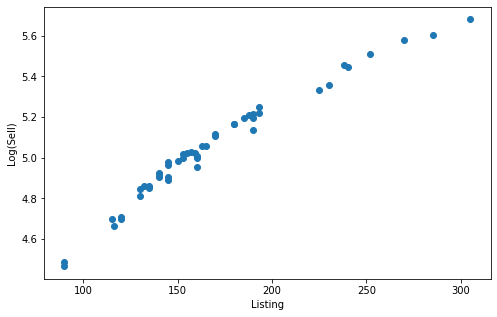

In [165]:
plt.figure(figsize=(8,5))

plt.scatter(data['List'],np.log(data['Sell']))
plt.xlabel('Listing')
plt.ylabel('Log(Sell)')

plt.show()

In [202]:
m3 = smf.ols('np.log(Sell) ~ Living + np.log(Living) + Rooms + Beds + Baths + Age + Acres + Taxes + belowavg + aboveavg', data=data)
m3fitted = m3.fit()

print(m3fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Sell)   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     17.66
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.20e-11
Time:                        20:42:01   Log-Likelihood:                 38.190
No. Observations:                  49   AIC:                            -54.38
Df Residuals:                      38   BIC:                            -33.57
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.2253      0.774      6.

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


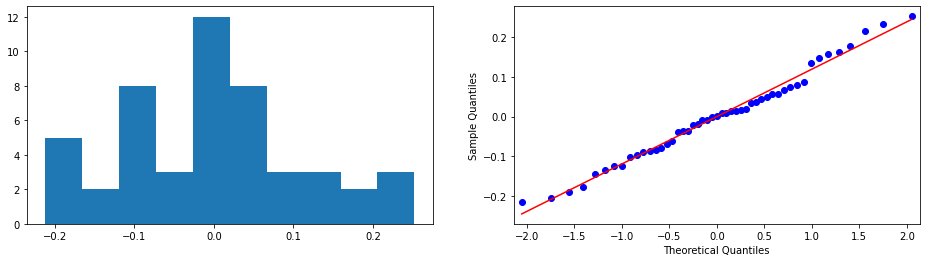

In [203]:
# —Å–º–æ—Ç—Ä–∏–º –æ—Å—Ç–∞—Ç–∫–∏
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

m3fitted.resid.hist(ax=ax1, grid=False)
qqplot(m2fitted.resid, line='r',ax=ax2)

plt.show()

–°–∏—Ç—É–∞—Ü–∏—è —É–ª—É—á—à–∏–ª–∞—Å—å: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ —Å—Ç–∞–ª–æ –±–æ–ª–µ–µ –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω—ã–º –∏ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã–º –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω—É–ª—è. –•–æ—Ç—å –∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏  ùëÖ2
R
2
  —Å–∏–ª—å–Ω–æ –Ω–µ –∏–∑–º–µ–Ω–∏–ª—Å—è, –æ—Å—Ç–∞–≤–∏–º —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –≤ –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏, —Ç–∞–∫ –∫–∞–∫ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ—Å—Ç—å –∏ –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å –æ—à–∏–±–æ–∫ —É–ª—É—á—à–∏—Ç —Ç–æ—á–Ω–æ—Å—Ç—å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –¥–ª—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ –ø—Ä–æ–≤–µ—Ä–∫—É –≥–∏–ø–æ—Ç–µ–∑ –æ –∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö (–¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –∏ –∫—Ä–∏—Ç–µ—Ä–∏–∏ —Å—Ç—Ä–æ—è—Ç—Å—è –≤ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–∏ –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –æ—à–∏–±–æ–∫).

In [204]:
# –£–¥–∞–ª–∏–º –ø—Ä–∏–∑–Ω–∞–∫ –∑–∞–ø—Ä–∞—à–∏–≤–∞–µ–º–∞—è —Ü–µ–Ω–∞
m4 = smf.ols('np.log(Sell) ~ Rooms + Beds + Baths + Age + Acres + Taxes + belowavg + aboveavg', data=data)
m4fitted = m4.fit()

print(m4fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Sell)   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     15.20
Date:                Wed, 05 May 2021   Prob (F-statistic):           5.89e-10
Time:                        20:42:06   Log-Likelihood:                 29.983
No. Observations:                  49   AIC:                            -41.97
Df Residuals:                      40   BIC:                            -24.94
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4162      0.211     20.938      0.0

–ú–æ–¥–µ–ª—å 4 (–±–µ–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ List) –ø–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º —Ö—É–∂–µ.

In [205]:
# –û—Ü–µ–Ω–∏–º –º–æ–¥–µ–ª—å –ø–æ –∫—Ä–µ—Ç–µ—Ä–∏—é –§–∏—à–µ—Ä–∞:

print("F=%f, pvalue=%f, k1=%f" % m3fitted.compare_f_test(m4fitted))

F=7.560061, pvalue=0.001722, k1=2.000000


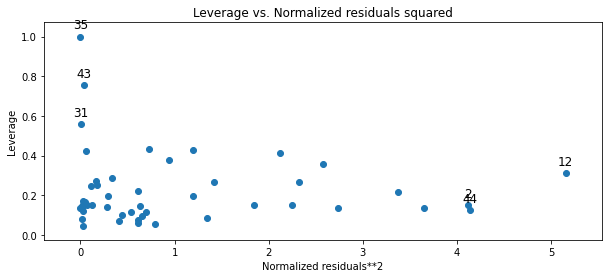

In [206]:
plt.rc("figure", figsize=(10,4))
plot_leverage_resid2(m3fitted)
plt.show()

–£–¥–∞–ª–µ–Ω–∏–µ –¥—Ä—É–≥–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–µ –ø—Ä–∏–Ω–µ—Å–ª–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤. –õ—É—á—à–∞—è –æ–∫–∞–∑–∞–ª–∞—Å—å –º–æ–¥–µ–ª—å ‚Ññ3 –û–Ω–∞ –æ–±—ä—è—Å–Ω—è–µ—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ $80\%$ –≤–∞—Ä–∏–∞—Ü–∏–∏ –æ—Ç–∫–ª–∏–∫–∞ ‚Äî –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ —Ü–µ–Ω—ã –ø—Ä–æ–¥–∞–∂–∏. –í—ã–ø–∏—à–µ–º —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–µ —É—Ä–∞–≤–Ω–µ–Ω–∏–µ:

$$
\log(\text{Sell}) \approx 
+0.0381 \cdot \text{Living} -0.3147  \cdot \log{\text{Living}}
-0.0264 \cdot \text{Rooms} +0.0211 \cdot \text{Beds}
-0.0252 \cdot \text{Baths} -0.0017 \cdot \text{Age}\\
+0.0313 \cdot \text{Acres}  +0.00007 \cdot \text{Taxes}
-0.2023 \cdot \text{belowavg}  -0.0201 \cdot \text{aboveavg}.
$$
  
–≠—Ç–æ –º–æ–∂–Ω–æ –∑–∞–ø–∏—Å–∞—Ç—å –≤ —Å–ª–µ–¥—É—é—â–µ–º –≤–∏–¥–µ: 

$$
\text{Sell} \approx  {-0.3147 \cdot {\text{Living}}} \cdot e^{+0.0381 \text{Living }}  
\cdot e^{-0.0264 \text{Rooms}} \cdot e^{+0.0211 \text{Beds}}
\cdot e^{-0.0252 \text{Baths}} \cdot e^{-0.0017 \text{Age}}
\cdot e^{0.0313 \text{Acres}} \cdot e^{ -0.0021\text{Taxes}}
\cdot e^{-0.2023 \text{belowavg}} \cdot e^{ -0.0201\text{aboveavg}}.
$$
